In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

In [4]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [5]:
# read breast cancer wisconsin data into pandas data frame
breastCancer = pd.read_csv(target_url, header=None, prefix="V")
breastCancer.columns = ['Code Number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

#    #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)

print(breastCancer.head())
print(breastCancer.tail())

# print summary of data frame
summary = breastCancer.describe()
print(summary)

   Code Number  Clump Thickness  Uniformity of Cell Size  \
0      1000025                5                        1   
1      1002945                5                        4   
2      1015425                3                        1   
3      1016277                6                        8   
4      1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3  

In [6]:
# perform some data validations

# lets check for null values in the breast cancer data set
breastCancer.isnull().values.any()

False

In [7]:
# find dtypes for columns, all columns should be integers
breastCancer.dtypes

Code Number                     int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
# it appears there are few non integer values in 'Bare Nuclei' column, need to find out and replace

# convert series datatype to numeric, changing non-numeric values to NaN
# reference - https://gist.github.com/bsweger/e5817488d161f37dcbd2

breastCancer['Bare Nuclei'] = pd.to_numeric(breastCancer['Bare Nuclei'], errors='coerce')

In [9]:
# replace the NaN values with the median value of the column and convert to integer
breastCancer['Bare Nuclei'] = breastCancer['Bare Nuclei'].fillna(breastCancer['Bare Nuclei'].median()).astype(np.int64)

In [10]:
# find dtypes for columns, all columns should be integers
breastCancer.dtypes

Code Number                    int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

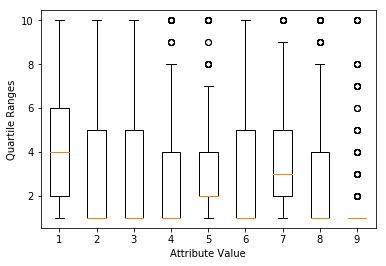

In [11]:
# box plot the real-valued attributes
# convert to array for plot routine

array = breastCancer.iloc[:,1:10].values
plot.boxplot(array)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges"))
plot.show()

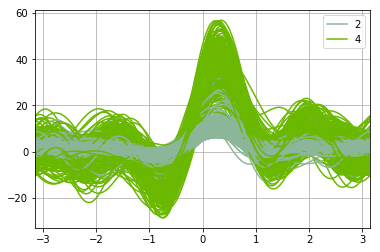

In [12]:
# Andrews curves allow one to plot multivariate data as a large number of curves 
# that are created using the attributes of samples as coefficients for Fourier series
# ignore the 'Code Number' column
from pandas.plotting import andrews_curves

andrews_curves(breastCancer.loc[:, breastCancer.columns != 'Code Number'], 'Class')
plot.show()

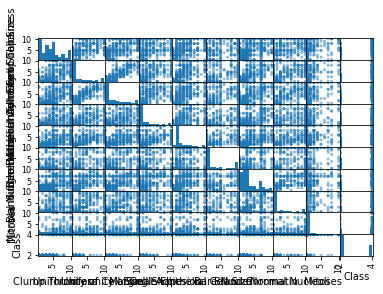

In [13]:
# scatterplot shows the relationship between two variables as dots in two dimensions
# ignore the 'Code Number' column
from pandas.plotting import scatter_matrix

scatter_matrix(breastCancer.loc[:, breastCancer.columns != 'Code Number'])
plot.show()

In [14]:
# getting the features and the labels

features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
           'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
X = breastCancer[features]
y = breastCancer['Class']

In [15]:
# encoding categorical data
# encoding the independent variable

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:,3] = labelencoder_X.fit_transform(X[:,3])
# onehotencoder = OneHotEncoder(categorical_features=[3])
# X = onehotencoder.fit_transform(X).toarray()

In [16]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# feature scaling
# from sklearn.preprocessing import StandardScalar
# sc_X = StandardScalar()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [18]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [20]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129   6]
 [  5  70]]


In [21]:
# visualizing the training set results
# works for 2 features only

# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arrange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
#                      np.arrange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X1.min(), X1.max())
# for i, j in enumerate(np.uniquely(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)

# plt.title('Logistic Regression (Training Set)')
# plt.xlabel('Clump Thickness')
# plt.ylabel('Uniformity of Cell Size')
# plt.lagend()
# plt.show()

In [22]:
# fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [24]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[130   5]
 [  3  72]]


In [25]:
# fitting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 1)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [27]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129   6]
 [  4  71]]


In [28]:
# fitting Kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [30]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[123  12]
 [  1  74]]


In [31]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [33]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125  10]
 [  3  72]]


In [34]:
# fitting decision tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [35]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [36]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125  10]
 [  9  66]]


In [37]:
# fitting random forest classifier tree to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
# predicting the test set
y_pred = classifier.predict(X_test)

In [39]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129   6]
 [  3  72]]


In [ ]:
# this is just a comment to test